In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading clustering libarires
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
airlines = pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name='data')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
airlines = airlines.drop('ID#',axis=1)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# rename
airlines = airlines.rename(columns={"Award?":"Award"})

In [5]:
#scaling the data
airlines_norm = preprocessing.normalize(airlines)
airlines_norm = pd.DataFrame(airlines_norm,columns=airlines.columns)
airlines_norm.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.0,0.0,0.241371,0.0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.0,0.0,0.340437,0.0


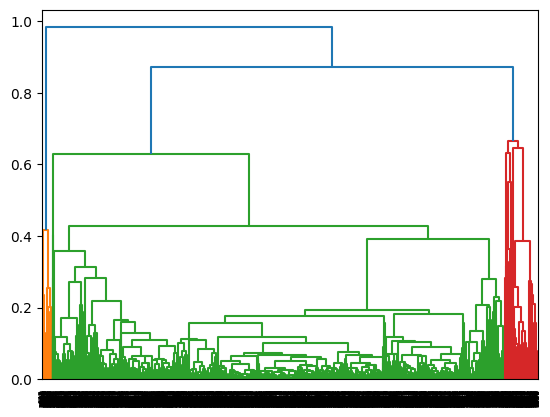

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='average'))

In [7]:
# lets try with three clusters
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(airlines_norm)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [8]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
airlines['h_clusterid']=Clusters
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [9]:
df_clust = airlines.groupby('h_clusterid').mean()
df_clust

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusterid,,,,,,,,,,,
0,19376.268199,94.639847,2.988506,1.022989,1.068966,38558.570881,16.417625,775.670498,2.210728,4323.180077,0.919540
1,2364.827586,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437
2,79175.229526,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894


profiling:
#cluster0:mostly award taking passengers are in this cluster and bonous_miles,fight_miles are quite high compare to other clusters.
#cluster1:The possibility is very low to get award,
#cluster2:The possibilty is little high to get award compare to cluster 1.

#KMEANS clustering 

In [11]:
from sklearn.cluster import KMeans

In [12]:
#normalsed data
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [13]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[267.59741095991893,
 173.2702562551139,
 116.32481600680401,
 90.82398630372964,
 70.4729640990143,
 60.079652613387644,
 51.93503081743263,
 47.17230616681256,
 42.88480186853374]

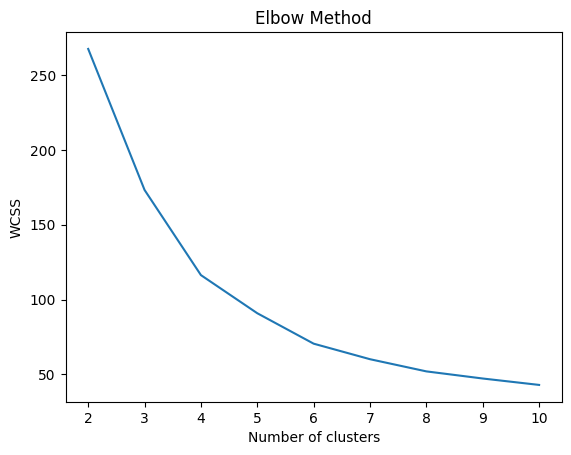

In [14]:
#plotting elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Build Kmeans_Cluster algorithm
clusters_kmeans = KMeans(4, random_state=42)
clusters_kmeans.fit(airlines_norm)
#Assign clusters to the data set
airlines['Kmeans_clusterid'] = clusters_kmeans.labels_
airlines.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,Kmeans_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1


In [16]:
airlines_kmean = airlines.drop('h_clusterid', axis=1)

In [22]:
airlines_kmean.groupby(['Kmeans_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_clusterid,,,,,,,,,,,
0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319
1,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064
2,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099
3,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950


profiling:
#cluster0:awarded persons are low in this cluster and observed bonus_miles and flight_miles_12months mean is low compare to cluster 1 and 2(which are having high award persons)
#cluster 1: awarded persons mean is little high compare to cluster 0 and 3 but low compare to cluster 2. bonous_miles and flight_miles_12months average columns also low compare to cluster 2.
#cluster 2: awarded persons mean is high compare to all clusters and bonus_miles,flight_miles_12months column mean values are also high compare to all clusters.
#cluster3:award persons mean is very low compare to all clusters and bonus_miles,flight_miles_12months column mean values are also Low compare to all clusters.

#DBSCAN CLUSTERING

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
#scaled data
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [26]:
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(airlines_norm)
airlines['dbscan_clusterid'] = dbscan.labels_
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,Kmeans_clusterid,dbscan_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0


In [28]:
airlines_dbscan = airlines.drop(['h_clusterid','Kmeans_clusterid'],axis=1)
airlines_dbscan.groupby(['dbscan_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
dbscan_clusterid,,,,,,,,,,,
0,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343


In [30]:
# lets try with low epsilon and more numbers of points to increase clusters numbers
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(airlines_norm)
airlines_dbscan['dbscan_clusterid'] = dbscan.labels_
airlines_dbscan.groupby(['dbscan_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
dbscan_clusterid,,,,,,,,,,,
-1,4394.571429,1457.428571,1.428571,1.000000,1.000000,4517.571429,15.000000,3102.285714,11.000000,2779.285714,0.285714
0,73722.682114,141.811623,2.060621,1.014529,1.012275,17166.988226,11.595942,455.422595,1.356713,4120.907816,0.370491


In [31]:
from sklearn import metrics
print(metrics.silhouette_score(airlines_norm,dbscan.labels_))

0.56104272770828


In [34]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan.fit(airlines_norm)
airlines_dbscan['dbscan_clusterid'] = dbscan.labels_
airlines_dbscan.groupby(['dbscan_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
dbscan_clusterid,,,,,,,,,,,
-1,12967.891304,1625.413043,1.521739,1.000000,1.000000,12166.608696,14.217391,3078.260870,7.456522,3768.804348,0.608696
0,74469.240619,127.017241,2.067951,1.014706,1.012424,17232.427738,11.574797,428.650355,1.297414,4119.501521,0.366633
1,2076.000000,0.000000,1.333333,1.000000,1.000000,4125.666667,9.666667,0.000000,0.000000,6257.333333,1.000000
2,7214.333333,196.333333,1.000000,1.000000,1.000000,7438.000000,19.666667,2522.000000,11.000000,5000.666667,1.000000
3,210.000000,0.000000,1.000000,1.000000,1.000000,1063.333333,1.000000,0.000000,0.000000,5222.000000,0.333333
